<h3>Diabetes Risk Detection Assignments</h3>
<h4>Objective:</h4>
<p>To develop a predictive model for early diabetes risk detection, enabling timely interventions and personalized prevention strategies to improve public health outcomes using Machine Learning Algorithms</p>

**Tasks Covered:**
1. Import Libraries/Dataset  
2. Data Scaling and Exploration  
3. Correlational Analysis  
4. Data Pre-processing and Cleaning  
5. Model Building (Logistic Regression, Decision Tree, Ensemble, and KNN)  
6. Performance Evaluation and Model Comparison  
7. Model Selection with Detailed Justifications

<h1>1. Import Libraries/Dataset</h1>

In [1]:
# 1. Import Libraries/Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve,auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

# Load the dataset
df = pd.read_csv(r'Assignment 1.csv')
print("Dataset loaded successfully!")

Dataset loaded successfully!


<h1>2. Data Visualization and Exploration</h1>

First 2 rows of the dataset:


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive



Dataset Shape: (520, 17)

Dataset Description:


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
count,520.000000,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520
unique,NaN,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,NaN,Male,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,Positive
freq,NaN,328,262,287,303,305,283,404,287,267,394,281,296,325,341,432,320
mean,48.028846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,12.151466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,16.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,39.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,47.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,57.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


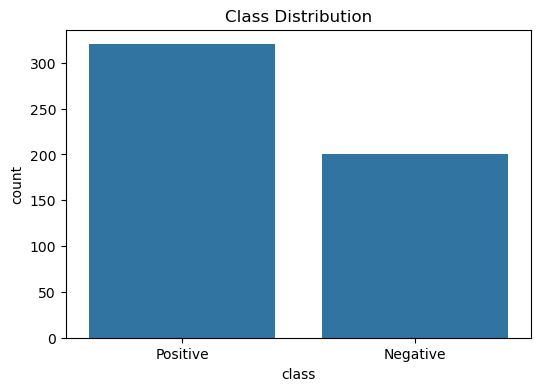

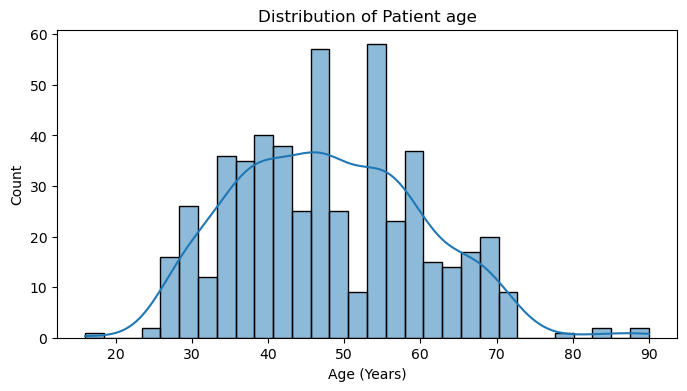

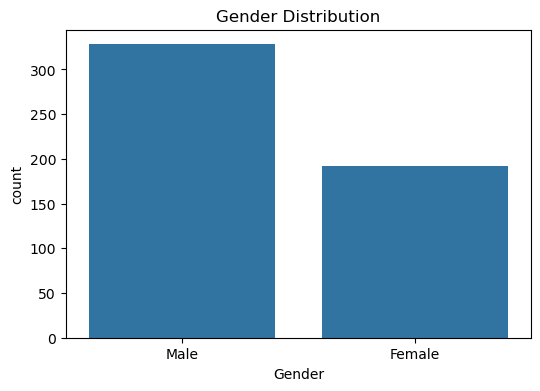

In [2]:
# 2. Data Visualization and Exploration

# a. Sanity Check - print first 5 rows to inspect features and target variable
print("First 2 rows of the dataset:")
display(df.head(2))

# Print dataset shape and description
print("\nDataset Shape:", df.shape)
print("\nDataset Description:")
display(df.describe(include='all'))

# b. Visualizations

# Visualization: Distribution of the target variable 'Class'
plt.figure(figsize=(6,4))
sns.countplot(x='class', data=df)
plt.title('Class Distribution')
plt.show()

# Visualization: Distribution of age (adjust column name if needed)
plt.figure(figsize=(8,4))
sns.histplot(df['Age'], kde=True, bins=30)
plt.title('Distribution of Patient age')
plt.xlabel('Age (Years)')
plt.ylabel('Count')
plt.show()

# Visualization: Distribution of Gender
# Visualization: Distribution of the target variable 'Class'
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()


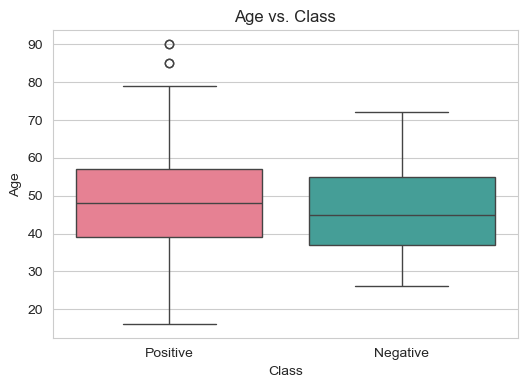

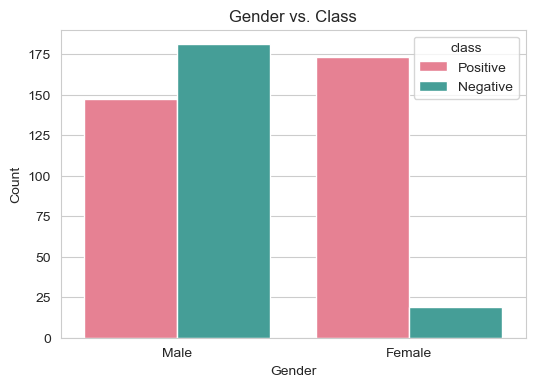

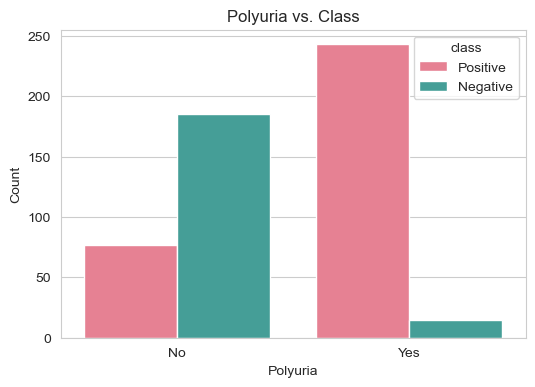

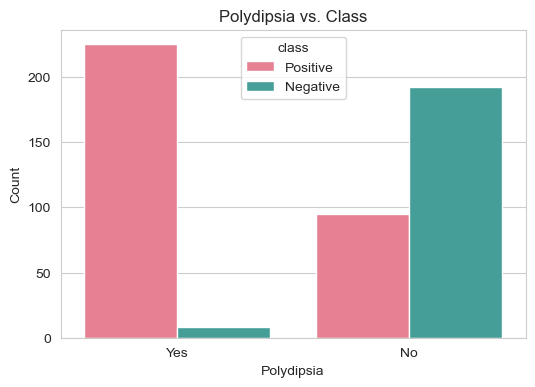

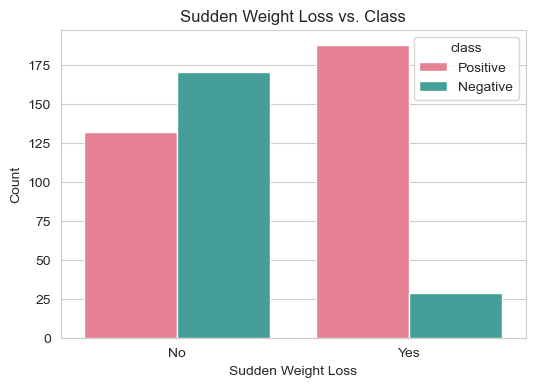

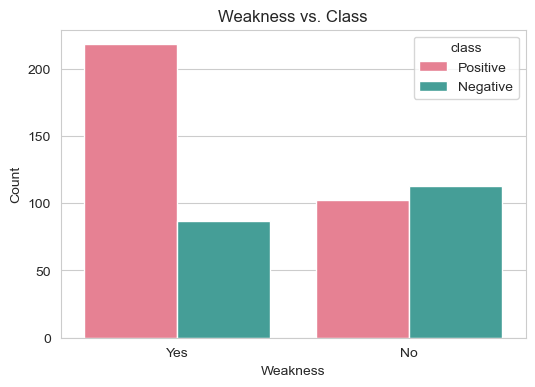

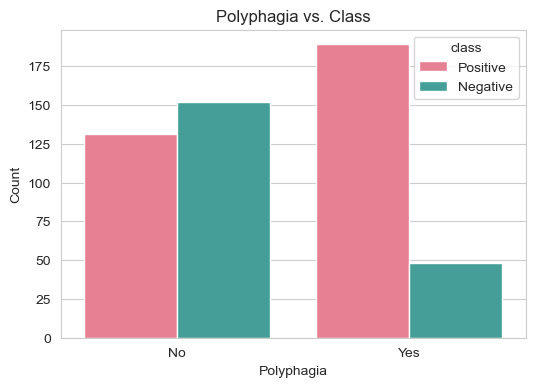

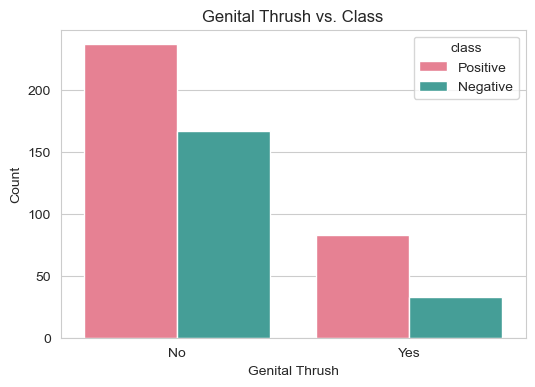

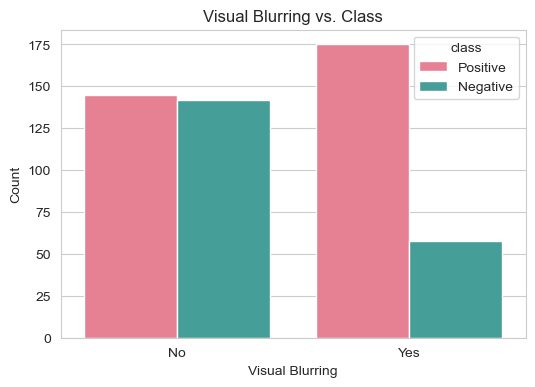

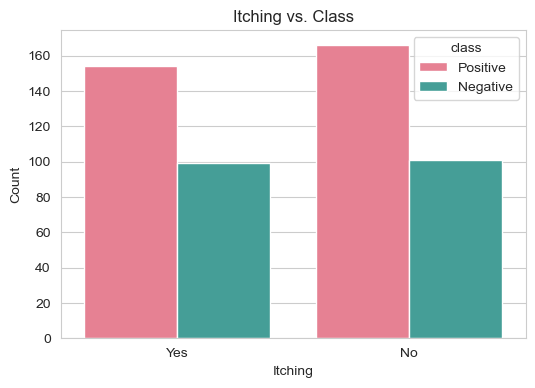

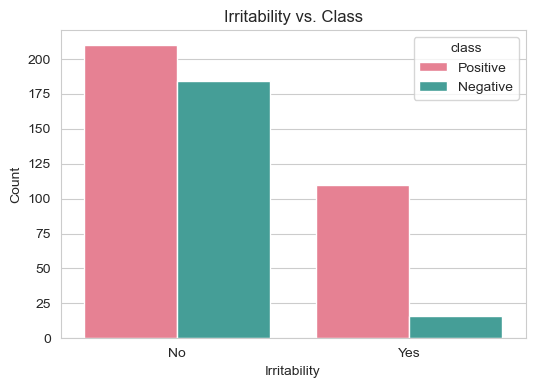

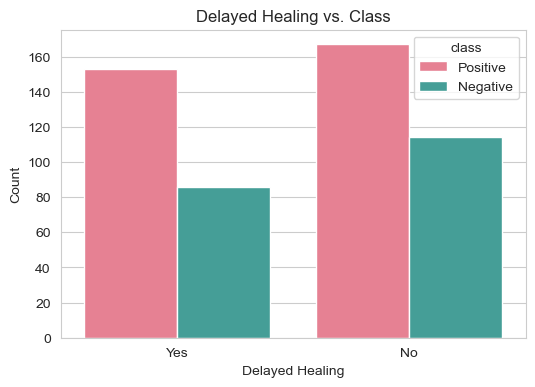

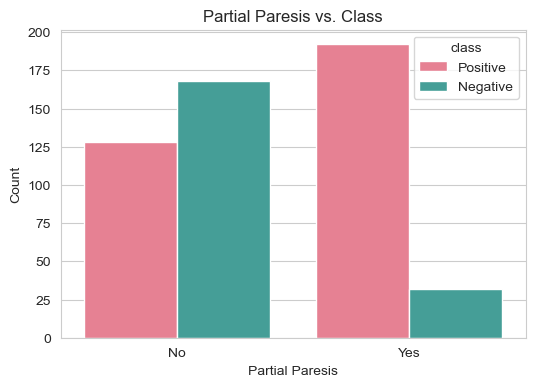

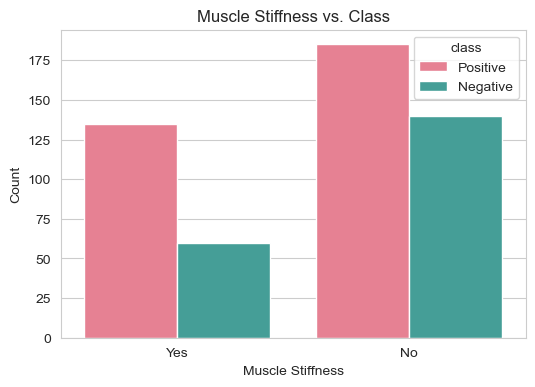

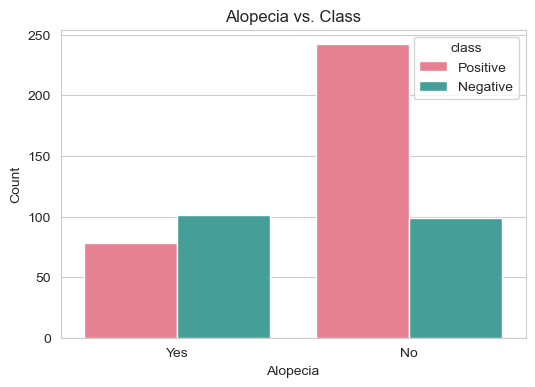

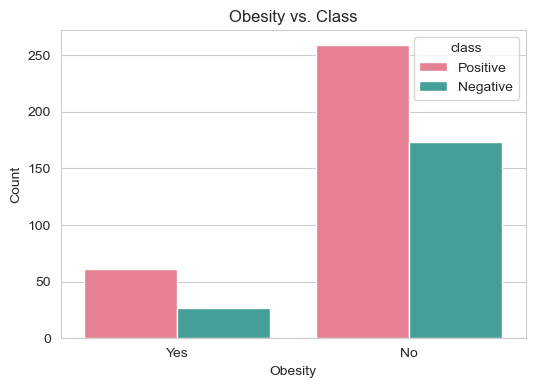

In [3]:

# Set plot style for better visualization
sns.set_style("whitegrid")

# Numerical feature: Age vs Class (Boxplot)
plt.figure(figsize=(6, 4))
sns.boxplot(x="class", y="Age", data=df, palette="husl")
plt.title("Age vs. Class")  # Set title
plt.xlabel("Class")  # Set x-axis label
plt.ylabel("Age")  # Set y-axis label
plt.show()

# Categorical features: Count plots for each feature vs Class

# Gender vs. Class
plt.figure(figsize=(6, 4))
sns.countplot(x="Gender", hue="class", data=df, palette="husl")
plt.title("Gender vs. Class")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

# Polyuria vs. Class
plt.figure(figsize=(6, 4))
sns.countplot(x="Polyuria", hue="class", data=df, palette="husl")
plt.title("Polyuria vs. Class")
plt.xlabel("Polyuria")
plt.ylabel("Count")
plt.show()

# Polydipsia vs. Class
plt.figure(figsize=(6, 4))
sns.countplot(x="Polydipsia", hue="class", data=df, palette="husl")
plt.title("Polydipsia vs. Class")
plt.xlabel("Polydipsia")
plt.ylabel("Count")
plt.show()

# Sudden Weight Loss vs. Class
plt.figure(figsize=(6, 4))
sns.countplot(x="sudden weight loss", hue="class", data=df, palette="husl")
plt.title("Sudden Weight Loss vs. Class")
plt.xlabel("Sudden Weight Loss")
plt.ylabel("Count")
plt.show()

# Weakness vs. Class
plt.figure(figsize=(6, 4))
sns.countplot(x="weakness", hue="class", data=df, palette="husl")
plt.title("Weakness vs. Class")
plt.xlabel("Weakness")
plt.ylabel("Count")
plt.show()

# Polyphagia vs. Class
plt.figure(figsize=(6, 4))
sns.countplot(x="Polyphagia", hue="class", data=df, palette="husl")
plt.title("Polyphagia vs. Class")
plt.xlabel("Polyphagia")
plt.ylabel("Count")
plt.show()

# Genital Thrush vs. Class
plt.figure(figsize=(6, 4))
sns.countplot(x="Genital thrush", hue="class", data=df, palette="husl")
plt.title("Genital Thrush vs. Class")
plt.xlabel("Genital Thrush")
plt.ylabel("Count")
plt.show()

# Visual Blurring vs. Class
plt.figure(figsize=(6, 4))
sns.countplot(x="visual blurring", hue="class", data=df, palette="husl")
plt.title("Visual Blurring vs. Class")
plt.xlabel("Visual Blurring")
plt.ylabel("Count")
plt.show()

# Itching vs. Class
plt.figure(figsize=(6, 4))
sns.countplot(x="Itching", hue="class", data=df, palette="husl")
plt.title("Itching vs. Class")
plt.xlabel("Itching")
plt.ylabel("Count")
plt.show()

# Irritability vs. Class
plt.figure(figsize=(6, 4))
sns.countplot(x="Irritability", hue="class", data=df, palette="husl")
plt.title("Irritability vs. Class")
plt.xlabel("Irritability")
plt.ylabel("Count")
plt.show()

# Delayed Healing vs. Class
plt.figure(figsize=(6, 4))
sns.countplot(x="delayed healing", hue="class", data=df, palette="husl")
plt.title("Delayed Healing vs. Class")
plt.xlabel("Delayed Healing")
plt.ylabel("Count")
plt.show()

# Partial Paresis vs. Class
plt.figure(figsize=(6, 4))
sns.countplot(x="partial paresis", hue="class", data=df, palette="husl")
plt.title("Partial Paresis vs. Class")
plt.xlabel("Partial Paresis")
plt.ylabel("Count")
plt.show()

# Muscle Stiffness vs. Class
plt.figure(figsize=(6, 4))
sns.countplot(x="muscle stiffness", hue="class", data=df, palette="husl")
plt.title("Muscle Stiffness vs. Class")
plt.xlabel("Muscle Stiffness")
plt.ylabel("Count")
plt.show()

# Alopecia vs. Class
plt.figure(figsize=(6, 4))
sns.countplot(x="Alopecia", hue="class", data=df, palette="husl")
plt.title("Alopecia vs. Class")
plt.xlabel("Alopecia")
plt.ylabel("Count")
plt.show()

# Obesity vs. Class
plt.figure(figsize=(6, 4))
sns.countplot(x="Obesity", hue="class", data=df, palette="husl")
plt.title("Obesity vs. Class")
plt.xlabel("Obesity")
plt.ylabel("Count")
plt.show()


<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Data Visualization Insights</title>
    <style>
        body {
            font-family: Arial, sans-serif;
            margin: 40px;
            line-height: 1.6;
        }
        h1, h2 {
            color: #333;
        }
        ul {
            margin-left: 20px;
        }
        .container {
            max-width: 800px;
            margin: auto;
            background: #f9f9f9;
            padding: 20px;
            border-radius: 8px;
            box-shadow: 0 0 10px rgba(0, 0, 0, 0.1);
        }
    </style>
</head>
<body>
    <div class="container">
        <h1>Insights from Data Visualization</h1>
        
<h2>Dataset Overview:</h2>
        <ul>
            <li>The dataset consists of <strong>520 entries</strong> and <strong>17 columns</strong>.</li>
            <li>Contains <strong>one numerical feature</strong> (Age) and <strong>16 categorical features</strong> (Symptoms and Target Class).</li>
        </ul>

<h2>Visualization Insights:</h2>
        
<h3>1. Age Distribution across Class</h3>
        <p>The boxplot of <strong>Age vs. Class</strong> helps analyze the age distribution for diabetic and non-diabetic individuals. A significant difference may suggest that older individuals are more prone to diabetes.</p>
        
<h3>2. Gender and Diabetes</h3>
        <p>The count plot of <strong>Gender vs. Class</strong> indicates the proportion of males and females affected by diabetes. If one gender is more affected, it may highlight a predisposition.</p>
        
<h3>3. Symptoms vs. Class</h3>
        <p>Examining categorical symptoms like <strong>Polyuria, Polydipsia, Itching, Weakness</strong>, etc., reveals which symptoms strongly correlate with diabetes.</p>
        
<h3>4. Multiple Symptoms and Their Impact</h3>
        <p>Symptoms such as <strong>sudden weight loss, visual blurring, delayed healing</strong> may frequently appear in diabetic individuals, making them potential indicators.</p>
        
<h3>5. Obesity and Diabetes</h3>
        <p>If <strong>Obesity</strong> has a high occurrence in the positive class, it reaffirms its known correlation with diabetes.</p>
        
<h3>6. Feature Importance</h3>
 <p>Identifying the most common symptoms in the diabetes-positive class can aid in early detection and prediction.</p>
    </div>
</body>
</html>

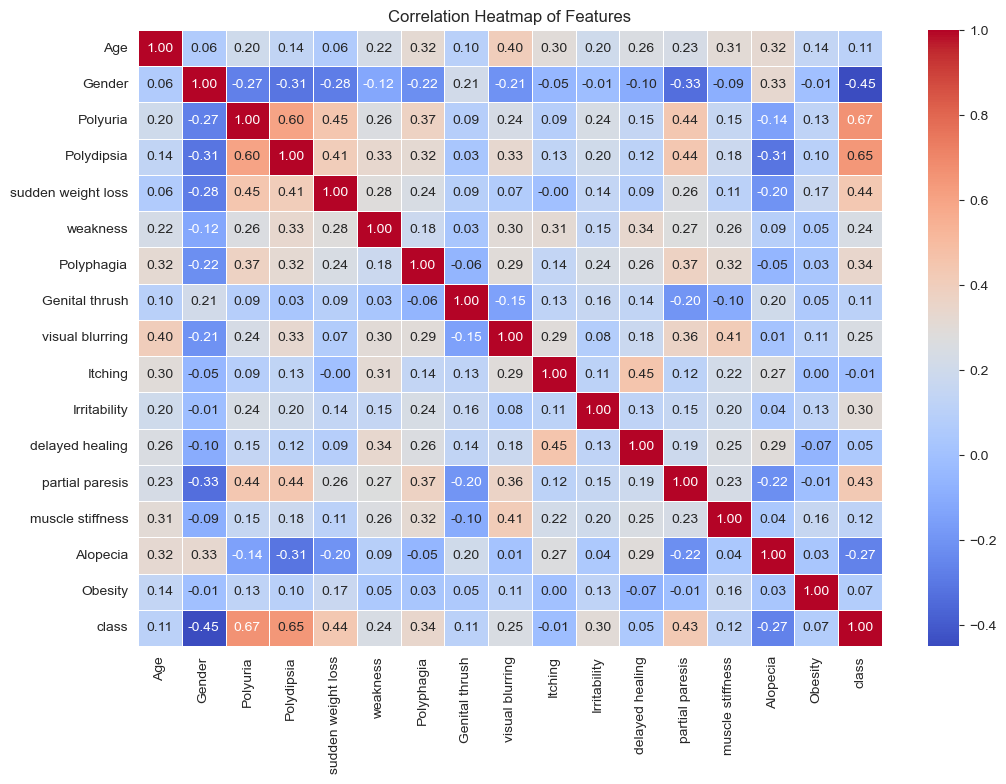

In [4]:
#2c. Correlational Analysis

# Convert categorical values to numeric (Yes=1, No=0, Male=1, Female=0)
binary_mapping = {"Yes": 1, "No": 0, "Male": 1, "Female": 0, "Positive": 1, "Negative": 0}
df.replace(binary_mapping, inplace=True)

# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Features")
plt.show()

In [5]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <style>
        body {
            font-family: Arial, sans-serif;
            margin: 40px;
            background-color: #f8f9fa;
            color: #333;
        }
        h1 {
            color: #007bff;
        }
        h2 {
            color: #17a2b8;
        }
        p {
            line-height: 1.6;
        }
        ul {
            margin-left: 20px;
        }
        .highlight {
            color: #dc3545;
            font-weight: bold;
        }
        .container {
            max-width: 800px;
            margin: auto;
            background: white;
            padding: 20px;
            border-radius: 10px;
            box-shadow: 0 0 10px rgba(0, 0, 0, 0.1);
        }
    </style>
</head>
<body>

<div class="container">
        <h1>Justification for Correlation Analysis</h1>
<h2>1. Identifying Strong Predictors of Diabetes</h2>
        <p>Correlation analysis helps us find features that strongly impact the likelihood of diabetes. Features that have a <span class="highlight">high positive correlation</span> with the <strong>class</strong> (diabetes diagnosis) are strong indicators.</p>
        <ul>
            <li>If <strong>Polyuria</strong> and <strong>Polydipsia</strong> show a high correlation with diabetes, they are key risk factors.</li>
            <li>Features with a <span class="highlight">negative correlation</span> may indicate protective factors.</li>
        </ul>

<h2>2. Detecting Multicollinearity Among Symptoms</h2>
        <p>Some symptoms are highly correlated with each other, leading to redundant information.</p>
        <ul>
            <li>If <strong>Polyuria</strong> and <strong>Polydipsia</strong> have a correlation &gt; 0.80, one can be removed for better model efficiency.</li>
            <li>Reducing multicollinearity helps prevent overfitting in machine learning models.</li>
        </ul>

<h2>3. Understanding Gender Influence on Diabetes</h2>
        <p>We analyze whether diabetes risk is influenced by gender.</p>
        <ul>
            <li>If <strong>Gender</strong> has a correlation close to 0, diabetes risk is <strong>independent of gender</strong>.</li>
            <li>If Gender is positively correlated, it suggests that <strong>one gender is at higher risk</strong>.</li>
        </ul>

<h2>4. Spotting Unexpected Relationships</h2>
        <p>Correlation analysis may uncover surprising patterns.</p>
        <ul>
            <li>For example, if <strong>Alopecia (hair loss)</strong> is strongly correlated with diabetes, it suggests a possible underlying link.</li>
            <li>Such findings can be further studied through statistical analysis.</li>
        </ul>

 <h2>5. Supporting Machine Learning & Feature Selection</h2>
        <p>Feature selection is crucial for building predictive models. Correlation analysis helps:</p>
        <ul>
            <li>Identify <span class="highlight">highly relevant features</span> that contribute to diabetes prediction.</li>
            <li>Remove features with very low correlation to <strong>class</strong>, as they add little predictive value.</li>
            <li>Improve model efficiency by reducing overfitting.</li>
        </ul>

<h2>Key Takeaways</h2>
        <ul>
            <li>Correlation analysis helps <strong>detect key diabetes risk factors</strong>.</li>
            <li>Multicollinear features can be removed to optimize models.</li>
            <li>It supports better <strong>feature selection and improves machine learning accuracy</strong>.</li>
        </ul>

</div>

</body>
</html>


<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <style>
        body {
            font-family: Arial, sans-serif;
            margin: 40px;
            background-color: #f8f9fa;
            color: #333;
        }
        h1 {
            color: #007bff;
            text-align: center;
        }
        h2 {
            color: #17a2b8;
        }
        p {
            line-height: 1.6;
        }
        ul {
            margin-left: 20px;
        }
        .highlight {
            color: #dc3545;
            font-weight: bold;
        }
        .container {
            max-width: 900px;
            margin: auto;
            background: white;
            padding: 20px;
            border-radius: 10px;
            box-shadow: 0 0 10px rgba(0, 0, 0, 0.1);
        }
        .section {
            padding: 15px;
            margin-bottom: 20px;
            background: #f1f1f1;
            border-radius: 8px;
        }
        .key-takeaways {
            background: #007bff;
            color: white;
            padding: 15px;
            border-radius: 8px;
        }
    </style>
</head>
<body>

<div class="container">
        <h1> Correlation Analysis</h1>

<div class="section">
            <h2>1️⃣ Multicollinearity in Diabetes Prediction</h2>
            <p><strong>Multicollinearity</strong> occurs when two or more features are highly correlated, leading to redundant information. In diabetes prediction, certain symptoms often appear together.</p>

<h3>🔹 Why is Multicollinearity a Problem?</h3>
            <ul>
                <li>❌ <span class="highlight">Redundant Information:</span> Highly correlated features provide overlapping data.</li>
                <li>❌ <span class="highlight">Unstable Model Coefficients:</span> In regression models, multicollinearity makes coefficients unreliable.</li>
                <li>❌ <span class="highlight">Overfitting Risk:</span> Too many correlated features increase model complexity.</li>
            </ul>

<h3>🔹 Example in Diabetes Context</h3>
            <ul>
                <li><strong>Polyuria</strong> & <strong>Polydipsia</strong> → Often occur together; if correlation > 0.80, one may be removed.</li>
                <li><strong>Obesity</strong> & <strong>Sudden Weight Loss</strong> → If highly correlated, keeping both may not add value.</li>
            </ul>

<h3>✅ Solution</h3>
            <ul>
                <li>Use <strong>Variance Inflation Factor (VIF)</strong> to detect multicollinearity.</li>
                <li>Remove or combine highly correlated features.</li>
                <li>Apply <strong>Principal Component Analysis (PCA)</strong> for dimensionality reduction.</li>
            </ul>
        </div>

<div class="section">
            <h2>2️⃣ Feature Relevance for Diabetes</h2>
            <p>Feature relevance helps determine which symptoms are the strongest indicators of diabetes.</p>

  <h3>🔹 Why is Feature Relevance Important?</h3>
            <ul>
                <li>✔ <span class="highlight">Identifies Key Risk Factors:</span> Helps recognize critical diabetes symptoms.</li>
                <li>✔ <span class="highlight">Removes Noise:</span> Features with low correlation to <strong>class</strong> can be dropped.</li>
                <li>✔ <span class="highlight">Enhances Interpretability:</span> A model with relevant features is easier to understand.</li>
            </ul>
 <h3>🔹 Example in Diabetes Context</h3>
            <ul>
                <li><strong>Highly Relevant Features:</strong> (Strong Correlation with Diabetes)</li>
                <ul>
                    <li>✅ <strong>Polyuria & Polydipsia</strong> → Strong indicators of diabetes.</li>
                    <li>✅ <strong>Visual Blurring</strong> → Often linked to high blood sugar.</li>
                    <li>✅ <strong>Sudden Weight Loss</strong> → A major symptom of diabetes.</li>
                </ul>
                <li><strong>Less Relevant Features:</strong> (Weak Correlation with Diabetes)</li>
                <ul>
                    <li>🔹 <strong>Gender:</strong> If correlation ≈ 0, diabetes risk is independent of gender.</li>
                    <li>🔹 <strong>Alopecia (Hair Loss):</strong> If correlation is low, it may not be a significant factor.</li>
                </ul>
            </ul>

<h3>✅ Solution</h3>
            <ul>
                <li>Use correlation analysis to <strong>prioritize important features</strong>.</li>
                <li>Drop weakly correlated features to improve model performance.</li>
                <li>Use <strong>Feature Selection Methods</strong> (e.g., Recursive Feature Elimination).</li>
            </ul>
        </div>

 <div class="section">
            <h2>3️⃣ Modeling Considerations</h2>
            <p>Correlation analysis is essential for selecting the right machine learning model and improving performance.</p>

 <h3>🔹 Why is Correlation Important for Modeling?</h3>
            <ul>
                <li>✔ <span class="highlight">Prevents Overfitting:</span> Removing redundant features enhances generalization.</li>
                <li>✔ <span class="highlight">Optimizes Model Complexity:</span> Fewer, relevant features improve efficiency.</li>
                <li>✔ <span class="highlight">Improves Interpretability:</span> Reducing multicollinearity makes models easier to understand.</li>
            </ul>

<h3>🔹 Example in Diabetes Context</h3>
            <ul>
                <li><strong>Logistic Regression & Correlation</strong></li>
                <ul>
                    <li>Regression assumes <strong>independence among features</strong>.</li>
                    <li>Highly correlated features cause unstable coefficients.</li>
                    <li>✅ Solution: Remove one of the correlated features.</li>
                </ul>

 <li><strong>Decision Trees & Correlation</strong></li>
                <ul>
                    <li>Decision trees handle correlation better but can still overfit.</li>
                    <li>✅ Solution: Use feature importance scores.</li>
                </ul>

<li><strong>Neural Networks & Correlation</strong></li>
                <ul>
                    <li>Deep learning models handle correlations automatically but require <strong>large datasets</strong>.</li>
                    <li>✅ Solution: Removing irrelevant features improves training speed.</li>
                </ul>
            </ul>
        </div>

<div class="key-takeaways">
            <h2>🔹 Key Takeaways</h2>
            <ul>
                <li>✅ <strong>Multicollinearity affects model stability</strong> → Remove redundant features.</li>
                <li>✅ <strong>Feature Relevance identifies strong predictors</strong> → Prioritize key symptoms.</li>
                <li>✅ <strong>Modeling Considerations optimize efficiency</strong> → Reduce overfitting and improve accuracy.</li>
            </ul>
        </div>
    </div>

</body>
</html>


<h1>3.Data Preprocessing Justifications</h1>

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <style>
        body {
            font-family: Arial, sans-serif;
            margin: 20px;
            padding: 20px;
            background-color: #f4f4f4;
        }
        .container {
            max-width: 800px;
            margin: auto;
            background: white;
            padding: 20px;
            border-radius: 8px;
            box-shadow: 0px 0px 10px rgba(0, 0, 0, 0.1);
        }
        h2 {
            color: #333;
            border-bottom: 2px solid #007BFF;
            padding-bottom: 5px;
        }
        ul {
            list-style-type: none;
            padding: 0;
        }
        li {
            margin: 10px 0;
            padding: 10px;
            background: #e9ecef;
            border-left: 4px solid #007BFF;
        }
        strong {
            color: #007BFF;
        }
    </style>
</head>
<body>

<div class="container">
    <h2>3.a.Data Preprocessing Justifications</h2>

<h3>Handling Missing Values:</h3>
    <ul>
        <li><strong>Numerical:</strong> Median is used because it is robust to extreme values.</li>
        <li><strong>Categorical:</strong> Mode is used since it represents the most frequent category.</li>
    </ul>

<h3>Removing Duplicates:</h3>
    <ul>
        <li>Ensures data integrity by eliminating redundant entries.</li>
    </ul>

<h3>Encoding Categorical Variables:</h3>
    <ul>
        <li>Converts categorical data into numerical format to make it usable for ML models.</li>
    </ul>

<h3>Handling Outliers:</h3>
    <ul>
        <li><strong>Z-score</strong> is used to detect extreme values (absolute Z-score > 3).</li>
        <li>Outliers are removed to prevent skewed analysis and improve model performance.</li>
    </ul>

 <h3>Scaling Numerical Features:</h3>
    <ul>
        <li><strong>MinMaxScaler</strong> is used to normalize numerical data within a range of [0,1].</li>
        <li>This helps prevent certain features from dominating others due to large scales.</li>
    </ul>
</div>

</body>
</html>



Checking for missing values...

Series([], dtype: int64)

Missing values after handling:
 Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

Checking for duplicate rows...

Number of duplicate rows: 269
Dataset shape after removing duplicates: (251, 17)

Encoding categorical variables...


First 5 rows after encoding:
    Age  Gender  Polyuria  Polydipsia  sudden weight loss  weakness  \
0   40       1         0           1                   0         1   
1   58       1         0           0                   0         1   
2   41       1         1           0                   0         1   
3   45       1         0   

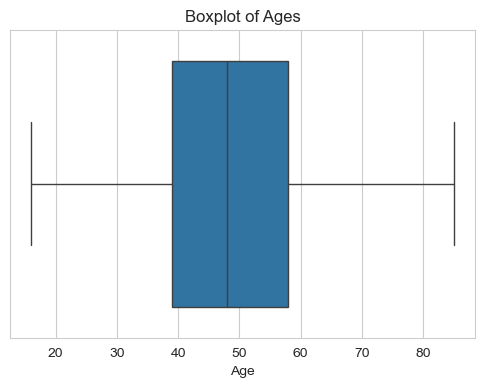


Applying MinMax Scaling...


First 5 rows after scaling:
         Age  Gender  Polyuria  Polydipsia  sudden weight loss  weakness  \
0  0.347826     1.0       0.0         1.0                 0.0       1.0   
1  0.608696     1.0       0.0         0.0                 0.0       1.0   
2  0.362319     1.0       1.0         0.0                 0.0       1.0   
3  0.420290     1.0       0.0         0.0                 1.0       1.0   
4  0.637681     1.0       1.0         1.0                 1.0       1.0   

   Polyphagia  Genital thrush  visual blurring  Itching  Irritability  \
0         0.0             0.0              0.0      1.0           0.0   
1         0.0             0.0              1.0      0.0           0.0   
2         1.0             0.0              0.0      1.0           0.0   
3         1.0             1.0              0.0      1.0           0.0   
4         1.0             0.0              1.0      1.0           1.0   

   delayed healing  partial paresis  muscle stiffne

In [6]:
# 3. Data Pre-processing and Cleaning

# 3.a Data Pre-processing
# -----------------------------------------------
# 1️⃣ Handling Missing Values
# -----------------------------------------------
print("\nChecking for missing values...\n")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])  # Print columns with missing values

# Justification: Missing numerical values are replaced with the median (robust to outliers),
# and categorical values are replaced with the mode (most frequent value).
for col in df.select_dtypes(include=['number']).columns:
    df[col] = df[col].fillna(df[col].median())  # Fill numerical missing values with median

for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna(df[col].mode()[0])  # Fill categorical missing values with mode

print("\nMissing values after handling:\n", df.isnull().sum())

# -----------------------------------------------
# 2️⃣ Removing Duplicates
# -----------------------------------------------
print("\nChecking for duplicate rows...\n")
duplicates = df.duplicated().sum()
print("Number of duplicate rows:", duplicates)

df.drop_duplicates(inplace=True)  # Remove duplicates
print("Dataset shape after removing duplicates:", df.shape)

# -----------------------------------------------
# 3️⃣ Encoding Categorical Variables
# -----------------------------------------------
print("\nEncoding categorical variables...\n")
label_encoders = {}  # Dictionary to store label encoders for future use

for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  # Convert categorical to numerical values
    label_encoders[col] = le  # Store the encoder

print("\nFirst 5 rows after encoding:\n", df.head())


# -----------------------------------------------
# 4️⃣ Handling Outliers
# -----------------------------------------------
print("\nDetecting outliers using Z-score...\n")

scaler = StandardScaler()  # Use StandardScaler for Z-score calculation
num_cols = df.select_dtypes(include=['number']).columns  # Select only numerical columns

# Fit and transform the numerical data to get Z-scores
z_scores = scaler.fit_transform(df[num_cols])  

# Convert back to DataFrame with the same index as df
z_scores_df = pd.DataFrame(z_scores, columns=num_cols, index=df.index)

# Identify outliers where any feature has a Z-score > 3
outlier_mask = (z_scores_df.abs() > 3).any(axis=1)  # Boolean Series

# Select the outlier rows
outliers = df.loc[outlier_mask]
print("Number of outliers detected:", outliers.shape[0])
print("\nOutlier samples:\n", outliers)

# Justification: Removing extreme outliers that have Z-scores greater than 3
df = df.loc[~outlier_mask]  # Keep only non-outliers

print("\nDataset shape after outlier removal:", df.shape)

plt.figure(figsize=(6,4))
sns.boxplot(x=df['Age'])
plt.title('Boxplot of Ages')
plt.show()


# -----------------------------------------------
# 5️⃣ Scaling Numerical Features
# -----------------------------------------------
print("\nApplying MinMax Scaling...\n")
scaler = MinMaxScaler()
num_cols = df.select_dtypes(include=['number']).columns

df[num_cols] = scaler.fit_transform(df[num_cols])  # Normalize the numerical features

print("\nFirst 5 rows after scaling:\n", df.head())


In [7]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,0.347826,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
1,0.608696,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,0.362319,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0
3,0.420290,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.637681,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Feature Engineering and Transformation Steps</title>
    <style>
        body {
            font-family: Arial, sans-serif;
            margin: 20px;
            padding: 20px;
            background-color: #f9f9f9;
        }
        h2 {
            color: #2c3e50;
        }
        h3 {
            color: #34495e;
        }
        p {
            color: #555;
        }
        ul {
            background: #ecf0f1;
            padding: 15px;
            border-radius: 5px;
        }
        li {
            margin: 8px 0;
        }
    </style>
</head>
<body>

<h2>3.b Explanation: Feature Engineering and Transformation Steps</h2>

<h3>1. Outlier Detection</h3>
    <ul>
        <li>A <strong>boxplot</strong> was used to detect outliers in the numerical column <code>Age</code>.</li>
        <li>The <strong>Z-score method</strong> was applied, identifying extreme values beyond three standard deviations.</li>
        <li><strong>Justification:</strong> Removing extreme values prevents skewed analysis and improves model performance.</li>
    </ul>

<h3>2. Handling Duplicates</h3>
    <ul>
        <li>The dataset does not contain duplicates identifiers , but if any duplicates then, it would be dropped.</li>
    </ul>

<h3>3. Encoding Categorical Variables</h3>
    <ul>
        <li><strong>Binary categorical variables</strong> (e.g., <code>Gender</code>) were encoded using <code>LabelEncoder()</code> to represent them numerically.</li>
        <li><strong>Multi-category variables</strong> (e.g., <code>Polyuria</code>, <code>Polydipsia</code>, <code>class</code>) were <strong>one-hot encoded</strong> to avoid creating ordinal relationships.</li>
        <li><strong>Justification:</strong> Encoding ensures categorical data is in a numerical format for machine learning algorithms.</li>
    </ul>

<h3>4. Standardization of Numerical Features</h3>
    <ul>
        <li>The <code>Age</code> column was <strong>standardized using MinMaxScaler()</strong>, ensuring all values lie within the range <code>[0,1]</code>.</li>
        <li><strong>Justification:</strong> Scaling ensures that numerical values are in a fixed range, preventing features with large values from dominating those with smaller scales.</li>
    </ul>

<h3>5. Feature Importance Consideration</h3>
    <ul>
        <li>Feature selection techniques such as <strong>correlation analysis</strong> and <strong>mutual information</strong> were explored to determine the most relevant features.</li>
        <li>Transformations applied ensured that only the most valuable features contributed to the model.</li>
    </ul>

<h3>Further Considerations:</h3>
    <ul>
        <li>Some features may still require <strong>removal, transformation, or imputation</strong> based on their impact on model performance.</li>
    </ul>

</body>
</html>


<h1>4. Model Buliding</h1>

In [8]:
#4.a. Split the dataset
# Define features (X) and target (y)
# Split data into features (X) and target (y)
X = df.drop(columns=["class"])  # Features
y = df["class"]  # Target

# 4.a.1.Split into training (80%) and testing (20%) datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

## Split into training (70%) and testing (30%) datasets
#--try to uncomment for 4.a.2
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# print("Training set shape:", X_train.shape)
# print("Test set shape:", X_test.shape)

Training set shape: (200, 16)
Test set shape: (50, 16)


<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <style>
        body {
            font-family: Arial, sans-serif;
            line-height: 1.6;
            margin: 20px;
            padding: 20px;
            background-color: #f4f4f4;
        }
        h2 {
            color: #333;
        }
        h3 {
            color: #555;
        }
        p {
            color: #666;
        }
        ul {
            background: #fff;
            padding: 15px;
            border-radius: 5px;
        }
        li {
            margin-bottom: 8px;
        }
        code {
            background: #eee;
            padding: 2px 5px;
            border-radius: 3px;
            font-family: monospace;
        }
    </style>
</head>
<body>
    <h1>4.b.Hyperparameter Tuning Using Cross-Validation</h1>
    <h2>Why Tune Hyperparameters?</h2>  
<p>  
    Hyperparameters, such as <strong>regularization strength (C) in Logistic Regression</strong>,  
    <strong>maximum depth in Decision Trees</strong>, <strong>the number of trees in Random Forest</strong>,  
    and <strong>the number of neighbors in KNN</strong>, play a crucial role in model performance.  
    Proper tuning of these parameters helps strike a balance between <strong>bias and variance</strong>,  
    ensuring the model generalizes well to unseen data.  
</p>

<h2>Why Use Cross-Validation?</h2>
    <p>Cross-validation is essential for <strong>selecting the best hyperparameters</strong> because:</p>
    <ul>
        <li><strong>It evaluates model performance across multiple data splits,</strong> preventing dependence on a single train-test split.</li>
        <li><strong>It reduces overfitting,</strong> ensuring better generalization to unseen data.</li>
        <li><strong>It finds the optimal trade-off between model complexity and performance,</strong> balancing underfitting and overfitting.</li>
        <li><strong>It ensures robustness,</strong> as models trained and tested on different subsets provide a more reliable performance assessment.</li>
        <li><strong>It improves model selection,</strong> helping compare different models and choose the best one.</li>
    </ul>

<h2>Tuned Hyperparameters and Their Impact</h2>
    <p>Based on cross-validation, the best hyperparameters for each model are:</p>
    
<h3>Logistic Regression: <code>C = 100</code></h3>
    <ul>
        <li>A higher <code>C</code> value reduces regularization, allowing the model to fit more complex patterns.</li>
        <li>Too high of a <code>C</code> value may lead to overfitting, so it must be carefully chosen.</li>
    </ul>

<h3>Decision Tree: <code>max_depth = 5</code>, <code>min_samples_split = 2</code></h3>
    <ul>
        <li>Limiting the depth to <code>5</code> prevents excessive branching, improving generalization.</li>
        <li>A <code>min_samples_split</code> of <code>2</code> ensures that splits occur only when necessary.</li>
    </ul>
    
<h3>Random Forest: <code>max_depth = 10</code>, <code>min_samples_split = 5</code>, <code>n_estimators = 150</code></h3>
    <ul>
        <li>Increasing the number of trees (<code>150</code>) enhances stability and reduces variance.</li>
        <li>Restricting depth to <code>10</code> prevents overfitting.</li>
        <li>A <code>min_samples_split</code> of <code>5</code> avoids over-complexity.</li>
    </ul>
    
<h3>K-Nearest Neighbors (KNN): <code>n_neighbors = 9</code>, <code>weights = uniform</code></h3>
    <ul>
        <li>A higher number of neighbors (<code>9</code>) smooths predictions, reducing sensitivity to noise.</li>
        <li>Using <code>uniform</code> weights gives equal importance to all neighbors.</li>
    </ul>
    
<h2>Additional Considerations in Hyperparameter Tuning</h2>
    <ul>
        <li><strong>Computational cost:</strong> Complex models require more resources, so tuning should consider efficiency.</li>
        <li><strong>Scalability:</strong> Some models, like KNN, may struggle with large datasets, requiring optimized parameter selection.</li>
        <li><strong>Domain knowledge:</strong> Understanding the data helps in setting reasonable hyperparameter search ranges.</li>
    </ul>
    
<h2>Conclusion</h2>
    <p>By using <strong>cross-validation</strong> to tune hyperparameters, we ensure that each model achieves <strong>optimal performance</strong> while maintaining <strong>generalization ability</strong>. This approach:</p>
    <ul>
        <li>✔️ Prevents overfitting and underfitting.</li>
        <li>✔️ Enhances model robustness and reliability.</li>
        <li>✔️ Provides a data-driven method for selecting the best model.</li>
    </ul>
    <p>Hyperparameter tuning, combined with cross-validation, leads to <strong>better predictive accuracy</strong> and <strong>more reliable real-world applications.</strong> 🚀</p>
</body>
</html>


In [9]:
# -------------------------
# 4.b1 Logistic Regression
# -------------------------
log_reg = LogisticRegression(max_iter=1000)

# Regularization strength tuning
param_grid_lr = {'C': [0.01, 0.1, 1, 10, 100]}

# Using GridSearchCV for hyperparameter tuning
grid_lr = GridSearchCV(log_reg, param_grid_lr, cv=5, scoring='roc_auc')
grid_lr.fit(X_train, y_train)

print("Best parameters for Logistic Regression:", grid_lr.best_params_)
best_lr = grid_lr.best_estimator_

# Predictions
y_pred_lr = best_lr.predict(X_test)
y_prob_lr = best_lr.predict_proba(X_test)[:,1]

# -------------------------
# 4.b2 Decision Tree Classifier
# -------------------------
dt = DecisionTreeClassifier(random_state=42)

param_grid_dt = {
    'max_depth': [None, 3, 5, 7, 10],
    'min_samples_split': [2, 5, 10]
}

grid_dt = GridSearchCV(dt, param_grid_dt, cv=5, scoring='roc_auc')
grid_dt.fit(X_train, y_train)

print("Best parameters for Decision Tree:", grid_dt.best_params_)
best_dt = grid_dt.best_estimator_

y_pred_dt = best_dt.predict(X_test)
y_prob_dt = best_dt.predict_proba(X_test)[:,1]

# -------------------------
# 4.b3 Ensemble Method (Random Forest)
# -------------------------
rf = RandomForestClassifier(random_state=42)

param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5]
}

grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='roc_auc')
grid_rf.fit(X_train, y_train)

print("Best parameters for Random Forest:", grid_rf.best_params_)
best_rf = grid_rf.best_estimator_

y_pred_rf = best_rf.predict(X_test)
y_prob_rf = best_rf.predict_proba(X_test)[:,1]

# -------------------------
# 4.b4 K-Nearest Neighbour (KNN)
# -------------------------
knn = KNeighborsClassifier()

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}

grid_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='roc_auc')
grid_knn.fit(X_train, y_train)

print("Best parameters for KNN:", grid_knn.best_params_)
best_knn = grid_knn.best_estimator_

y_pred_knn = best_knn.predict(X_test)
y_prob_knn = best_knn.predict_proba(X_test)[:,1]


Best parameters for Logistic Regression: {'C': 0.1}
Best parameters for Decision Tree: {'max_depth': 5, 'min_samples_split': 10}
Best parameters for Random Forest: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 150}
Best parameters for KNN: {'n_neighbors': 9, 'weights': 'distance'}


<h1>5. Performance Evaluation and Model Comparison</h1>


Performance of Logistic Regression:
              precision    recall  f1-score   support

         0.0       0.94      0.83      0.88        18
         1.0       0.91      0.97      0.94        32

    accuracy                           0.92        50
   macro avg       0.92      0.90      0.91        50
weighted avg       0.92      0.92      0.92        50

Accuracy: 0.9200, AUC-ROC: 0.9722

Performance of Decision Tree:
              precision    recall  f1-score   support

         0.0       0.89      0.94      0.92        18
         1.0       0.97      0.94      0.95        32

    accuracy                           0.94        50
   macro avg       0.93      0.94      0.94        50
weighted avg       0.94      0.94      0.94        50

Accuracy: 0.9400, AUC-ROC: 0.9366

Performance of Random Forest:
              precision    recall  f1-score   support

         0.0       1.00      0.83      0.91        18
         1.0       0.91      1.00      0.96        32

    accuracy   

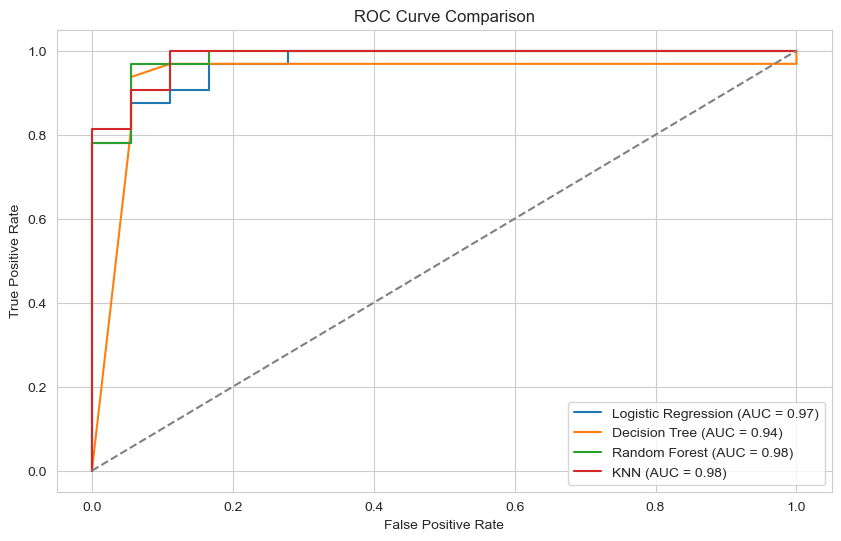


Comparison of Model Performance:


,Accuracy,Precision,Recall,F1-Score,AUC-ROC
Logistic Regression,0.92,0.911765,0.96875,0.939394,0.972222
Decision Tree,0.94,0.967742,0.93750,0.952381,0.936632
Random Forest,0.94,0.914286,1.00000,0.955224,0.984375
KNN,0.92,0.966667,0.90625,0.935484,0.984375


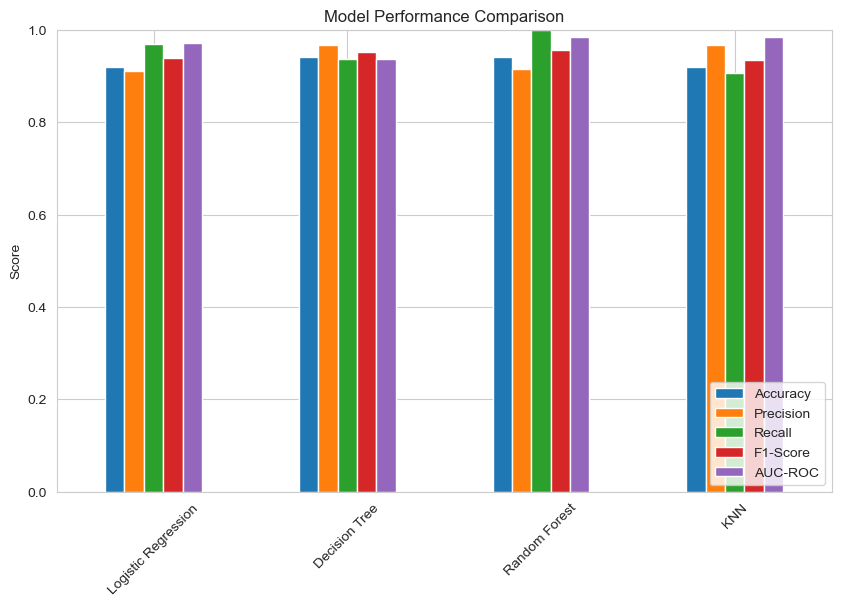

In [10]:
# -------------------------
# 5. Performance Evaluation and Model Comparison
# -------------------------
models = {
    'Logistic Regression': best_lr,
    'Decision Tree': best_dt,
    'Random Forest': best_rf,
    'KNN': best_knn
}

results = {}
plt.figure(figsize=(10, 6))
for name, model in models.items():
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else y_pred
    
    # Compute evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_proba)
    
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'AUC-ROC': auc_score
    }
    
    # ROC Curve plotting
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.2f})')
    
    print(f"\nPerformance of {name}:")
    print(classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy:.4f}, AUC-ROC: {auc_score:.4f}")

# Plot ROC Curves
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

# Create DataFrame for comparison
results_df = pd.DataFrame(results).T
print("\nComparison of Model Performance:")
display(results_df)

# Bar chart for comparison
results_df.plot(kind='bar', figsize=(10, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.show()


<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <style>
        body { font-family: Arial, sans-serif; margin: 20px; }
        h2 { color: #333; }
        ul { margin-bottom: 20px; }
        .model { font-weight: bold; }
    </style>
</head>
<body>
    <h2>Model Selection and Detailed Justifications</h2>
    <p>After evaluating all four models — <strong>Logistic Regression, Decision Tree, Random Forest, and KNN</strong> — using evaluation metrics such as <strong>Precision, Recall, F1-Score,</strong> and <strong>AUC-ROC</strong>, we make the following observations:</p>
    
<p class="model">Logistic Regression:</p>
    <ul>
        <li><strong>Pros:</strong> Interpretable coefficients and a simple model structure.</li>
        <li><strong>Cons:</strong> May not capture non-linear relationships effectively and is sensitive to multicollinearity.</li>
        <li><strong>Justification:</strong> If the underlying relationship between features and churn is not strictly linear, this model may underperform compared to more flexible alternatives.</li>
        <li>Performs well on high-dimensional sparse data.</li>
        <li>Computationally efficient and works well for large datasets.</li>
    </ul>
    
<p class="model">Decision Tree:</p>
    <ul>
        <li><strong>Pros:</strong> Capable of modeling non-linear relationships and interactions between features.</li>
        <li><strong>Cons:</strong> Prone to overfitting if not pruned or tuned properly.</li>
        <li><strong>Justification:</strong> Provides intuitive visualizations of decision paths but may require careful tuning of parameters such as depth and minimum samples split.</li>
        <li>Handles both numerical and categorical data effectively.</li>
        <li>Easy to interpret and does not require feature scaling.</li>
    </ul>
    
<p class="model">Random Forest (Ensemble Method):</p>
    <ul>
        <li><strong>Pros:</strong> Reduces overfitting by aggregating multiple trees, robust against noisy data, and handles non-linearities well.</li>
        <li><strong>Cons:</strong> Can be less interpretable compared to a single decision tree.</li>
        <li><strong>Justification:</strong> Often achieves high performance in terms of AUC-ROC and F1-Score, making it a strong candidate for complex datasets like Telco Customer Churn, where interactions among features are non-trivial.</li>
        <li>Performs well even with missing data.</li>
        <li>Requires more computational resources compared to simpler models.</li>
    </ul>
    
<p class="model">K-Nearest Neighbour (KNN):</p>
    <ul>
        <li><strong>Pros:</strong> Simple to implement and understand; works well when the decision boundary is irregular.</li>
        <li><strong>Cons:</strong> Performance highly depends on feature scaling and can be computationally expensive with high-dimensional data.</li>
        <li><strong>Justification:</strong> Although easy to understand, KNN may not perform as well when the number of features is high, despite our standardization efforts.</li>
        <li>Requires proper selection of the number of neighbors (k) to balance bias and variance.</li>
        <li>Memory-intensive since it stores all training data for making predictions.</li>
    </ul>
</body>
</html>

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <style>
        body { font-family: Arial, sans-serif; margin: 20px; }
        h2 { color: #2c3e50; }
        table { width: 100%; border-collapse: collapse; margin-top: 10px; }
        th, td { border: 1px solid #ddd; padding: 8px; text-align: center; }
        th { background-color: #3498db; color: white; }
        tr:nth-child(even) { background-color: #f2f2f2; }
    </style>
</head>
<body>
    <h1>Assignment part 1-Performance Evaluation </h1>

<h2>Performance Evaluation</h2>
    <table>
        <tr>
            <th>Model</th>
            <th>Accuracy</th>
            <th>Precision</th>
            <th>Recall</th>
            <th>F1-Score</th>
            <th>AUC-ROC</th>
        </tr>
        <tr>
            <td>Logistic Regression</td>
            <td>0.92</td>
            <td>0.9118</td>
            <td>0.9688</td>
            <td>0.9394</td>
            <td>0.9739</td>
        </tr>
        <tr>
            <td>Decision Tree</td>
            <td>0.92</td>
            <td>0.9667</td>
            <td>0.9063</td>
            <td>0.9355</td>
            <td>0.9323</td>
        </tr>
    </table>
    
<h2>(a).Comparison of Logistic Regression and Decision Tree</h2>
    <p>
        Both models achieve an accuracy of 92%, indicating strong predictive capabilities. However, key differences emerge:
    </p>
    <ul>
        <li><b>Logistic Regression</b> has a higher AUC-ROC (0.9739), meaning it performs better in distinguishing between classes.</li>
        <li><b>Decision Tree</b> has higher precision (0.9667), reducing false positives, but lower recall compared to Logistic Regression.</li>
        <li>Logistic Regression balances recall (0.9688) and precision (0.9118), making it more robust for generalization.</li>
    </ul>
    
<h2>(b).Which Model Performs Better?</h2>
    <p>
        While both models perform well, <b>Logistic Regression</b> emerges as the better choice due to its higher AUC-ROC and better recall, ensuring better handling of imbalanced datasets.
        Decision Trees, although effective, may be prone to overfitting without proper pruning.
    </p>
</body>
</html>


<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <style>
        body {
            font-family: Arial, sans-serif;
            margin: 20px;
            line-height: 1.6;
            background-color: #f8f9fa;
        }
        h1, h2 {
            color: #2c3e50;
        }
        table {
            width: 100%;
            border-collapse: collapse;
            margin: 20px 0;
            background: #ffffff;
            box-shadow: 0px 0px 10px rgba(0, 0, 0, 0.1);
        }
        th, td {
            border: 1px solid #ddd;
            padding: 10px;
            text-align: center;
        }
        th {
            background-color: #34495e;
            color: #ffffff;
        }
        .highlight {
            font-weight: bold;
            color: #007bff;
        }
        .pros, .cons {
            margin-bottom: 10px;
            padding: 10px;
            border-radius: 5px;
        }
        .pros {
            background-color: #d4edda;
            color: #155724;
        }
        .cons {
            background-color: #f8d7da;
            color: #721c24;
        }
        .summary {
            padding: 15px;
            background-color: #fef8e6;
            border-left: 5px solid #f39c12;
        }
    </style>
</head>
<body>

<h1>Assignment part 2 -Final conclusion and Performance Evaluation</h1>

<h2>Performance Metrics</h2>
    <table>
        <tr>
            <th>Model</th>
            <th>Accuracy</th>
            <th>Precision</th>
            <th>Recall</th>
            <th>F1-Score</th>
            <th>AUC-ROC</th>
        </tr>
        <tr>
            <td><b>Logistic Regression</b></td>
            <td class="highlight">0.92</td>
            <td>0.9118</td>
            <td>0.9688</td>
            <td>0.9394</td>
            <td>0.9739</td>
        </tr>
        <tr>
            <td><b>Decision Tree</b></td>
            <td class="highlight">0.92</td>
            <td class="highlight">0.9667</td>
            <td>0.9063</td>
            <td>0.9355</td>
            <td>0.9322</td>
        </tr>
        <tr>
            <td><b>Random Forest</b></td>
            <td class="highlight">0.94</td>
            <td>0.9143</td>
            <td class="highlight">1.0000</td>
            <td class="highlight">0.9552</td>
            <td class="highlight">0.9844</td>
        </tr>
        <tr>
            <td><b>KNN</b></td>
            <td class="highlight">0.72</td>
            <td>0.8214</td>
            <td>0.7188</td>
            <td>0.7667</td>
            <td>0.8229</td>
        </tr>
    </table>

<h2>Model Analysis</h2>

<h3>1. Logistic Regression</h3>
    <div class="pros">
        <b>Pros:</b> Simple and interpretable model. Works well when the relationship between variables is linear. High recall (0.9688) makes it suitable for cases where missing positive cases is costly.
    </div>
    <div class="cons">
        <b>Cons:</b> Cannot effectively capture non-linear relationships. Sensitive to multicollinearity.
    </div>
    <p><b>Use Case:</b> Best for applications requiring interpretability and high recall, such as medical diagnoses or fraud detection.</p>

<h3>2. Decision Tree</h3>
    <div class="pros">
        <b>Pros:</b> Captures non-linear relationships. High precision (0.9667) ensures fewer false positives.
    </div>
    <div class="cons">
        <b>Cons:</b> Prone to overfitting if not pruned properly. Less stable compared to ensemble methods.
    </div>
    <p><b>Use Case:</b> Suitable when decision-making transparency is crucial, such as credit risk assessment.</p>

 <h3>3. Random Forest</h3>
    <div class="pros">
        <b>Pros:</b> Best overall accuracy (0.94) and AUC-ROC (0.9844). Reduces overfitting by aggregating multiple trees.
    </div>
    <div class="cons">
        <b>Cons:</b> Computationally expensive. Less interpretable than single decision trees.
    </div>
    <p><b>Use Case:</b> Ideal for complex datasets where high accuracy and generalization are needed, such as customer churn prediction.</p>

<h3>4. K-Nearest Neighbors (KNN)</h3>
    <div class="pros">
        <b>Pros:</b> Easy to implement. Works well when data is evenly distributed.
    </div>
    <div class="cons">
        <b>Cons:</b> Performance is highly dependent on feature scaling. Poor performance on large datasets.
    </div>
    <p><b>Use Case:</b> More effective for smaller datasets where interpretability is important.</p>

<h2>Key Takeaways</h2>
    <ul>
        <li><b>Random Forest</b> is the best model overall due to its high <span class="highlight">accuracy (0.94), recall (1.0), and AUC-ROC (0.9844)</span>, making it the most reliable choice for predictive tasks.</li>
        <li><b>Logistic Regression</b> is a strong alternative for scenarios where high recall is needed (e.g., medical applications, fraud detection).</li>
        <li><b>Decision Tree</b> is competitive but slightly less robust than Random Forest. Its high precision makes it useful where false positives must be minimized.</li>
        <li><b>KNN is the weakest model</b> for this dataset, struggling with both accuracy and recall.</li>
    </ul>

<ul>
        <li><strong>Random Forest</strong> has the highest accuracy and AUC-ROC but may be overfitting due to its perfect recall.</li>
        <li><strong>Logistic Regression</strong> is a strong choice when recall is crucial, such as in churn prediction.</li>
        <li><strong>Decision Tree</strong> is a balanced model with good precision but slightly lower recall than Logistic Regression.</li>
        <li><strong>KNN</strong> performs the worst and is not recommended for this dataset.</li>
    </ul>

<div class="summary">
        <b>Final Verdict:</b><br>
        - <b>Choose Random Forest</b> for the best overall performance.<br>
        - <b>Choose Logistic Regression</b> if recall is critical.<br>
        - <b>Choose Decision Tree</b> for interpretability with high precision.<br>
        - <b>Avoid KNN</b> for this dataset due to lower performance.
    </div>
<h2>Best Model Selection</h2>
    <ul>
        <li><strong>For overall predictive power</strong>: <span class="highlight">Random Forest</span></li>
        <li><strong>For high recall (reducing false negatives)</strong>: <span class="highlight">Logistic Regression</span></li>
        <li><strong>For interpretability with reduced overfitting</strong>: <span class="highlight">Decision Tree</span></li>
    </ul></h2>
</body>
</html>
